In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pylab
from pylab import legend, plot, show, title, xlabel, ylabel
import seaborn as sns
from numpy import random
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import os
import scipy 
from scipy import stats
from scipy.stats import binom
from scipy.stats import poisson, norm, t
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor

# from statsmodels import discrete
# from statsmodels.discrete import discrete_model
# from statsmodels.discrete.discrete_model import MNLogit #multi nominal
# from statsmodels.miscmodels.ordinal_model import OrderedModel #multi nominal

# import statsmodels.formula.api as smf
# from statsmodels.discrete.discrete_model import Poisson as psn

# from statsmodels.discrete.discrete_model import NegativeBinomial as ngb
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# from sklearn.feature_selection import mutual_info_classif
# from sklearn.feature_selection import mutual_info_classif
# from sklearn.feature_selection import SelectKBest
# from sklearn.ensemble import ExtraTreesClassifier

# from sklearn.feature_selection import SequentialFeatureSelector
# from sklearn.linear_model import LinearRegression

# from sklearn.linear_model import Ridge
# from sklearn.model_selection import GridSearchCV

# from sklearn.linear_model import Lasso
# from sklearn.model_selection import GridSearchCV

# from sklearn.tree import DecisionTreeClassifier,plot_tree
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn import svm

# from sklearn.cluster import KMeans
# import scipy.cluster.hierarchy as sch
# from statsmodels.tsa.seasonal import seasonal_decompose
# from sklearn.metrics import mean_squared_error
# import warnings 
# warnings.filterwarnings('ignore')

# from statsmodels.tsa.api import SimpleExpSmoothing
# from statsmodels.tsa.api import Holt

# from statsmodels.tsa.stattools import adfuller
# from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.stattools import adfuller

In [2]:
# cars=pd.read_csv('used_cars_data.csv')  #enter path of dataset here

In [3]:
# !pip install kagglehub

In [4]:
#run only once to download the dataset-
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("ananaymital/us-used-cars-dataset")

# print("Path to dataset files:", path)

In [5]:
path=r'C:\Users\AAYUSH\Desktop\pml_dataset\used_cars_data.csv'
cars=pd.read_csv(path)

C:\Users\AAYUSH\AppData\Local\Temp\ipykernel_19036\3143018783.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  cars=pd.read_csv(path)


In [6]:
cars.head()

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,...,A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,...,M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020


In [7]:
cars.count()

vin                     3000040
back_legroom            2840771
bed                       19568
bed_height               429098
bed_length               429098
                         ...   
wheel_system            2853308
wheel_system_display    2853308
wheelbase               2840771
width                   2840771
year                    3000040
Length: 66, dtype: int64

In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000040 entries, 0 to 3000039
Data columns (total 66 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   vin                      object 
 1   back_legroom             object 
 2   bed                      object 
 3   bed_height               object 
 4   bed_length               object 
 5   body_type                object 
 6   cabin                    object 
 7   city                     object 
 8   city_fuel_economy        float64
 9   combine_fuel_economy     float64
 10  daysonmarket             int64  
 11  dealer_zip               object 
 12  description              object 
 13  engine_cylinders         object 
 14  engine_displacement      float64
 15  engine_type              object 
 16  exterior_color           object 
 17  fleet                    object 
 18  frame_damaged            object 
 19  franchise_dealer         bool   
 20  franchise_make           object 
 21  front_le

In [9]:
# sns.heatmap(cars.isna())

In [10]:
df_null_perc=((cars.isna().sum()/cars.shape[0])*100).sort_values(ascending=False)

In [11]:
pd.set_option('display.max_rows', None)
print(df_null_perc)
pd.reset_option('display.max_rows', None)

is_certified               100.000000
combine_fuel_economy       100.000000
vehicle_damage_category    100.000000
bed                         99.347742
cabin                       97.882262
is_oemcpo                   95.487993
is_cpo                      93.903481
bed_length                  85.696924
bed_height                  85.696924
owner_count                 50.566426
salvage                     47.552533
theft_title                 47.552533
frame_damaged               47.552533
fleet                       47.552533
has_accidents               47.552533
isCab                       47.552533
franchise_make              19.087579
torque                      17.259537
city_fuel_economy           16.375948
highway_fuel_economy        16.375948
power                       16.047319
interior_color              12.799363
main_picture_url            12.302936
major_options                6.668178
engine_displacement          5.746123
horsepower                   5.746123
width       

In [12]:
cars.shape

(3000040, 66)

In [13]:
cars.is_certified.isna().sum()

np.int64(3000040)

In [14]:
#removing all rows where percentage of null values is greater than 80%


In [15]:
# engine_displacement          

In [16]:
# engine_displacement -       5.746123
# horsepower                   5.746123
# combine_fuel_economy       100.000000
# body_type                    0.451427
# is_new                       0.000000
# is_certified               100.00000
# daysonmarket                 0.000000
# has_accidents               47.552533
# city                         0.000000
# dealer_zip                   0.000000


# is_cpo                      93.903481



In [17]:
# is_certified               100.000000
# combine_fuel_economy       100.000000
# vehicle_damage_category    100.000000
# bed                         99.347742
# cabin                       97.882262
# is_oemcpo                   95.487993
# is_cpo                      93.903481
# bed_length                  85.696924
# bed_height                  85.696924
# owner_count                 50.566426
# salvage                     47.552533
# theft_title                 47.552533
# frame_damaged               47.552533
# fleet                       47.552533
# has_accidents               47.552533
# isCab                       47.552533
# franchise_make              19.087579
# torque                      17.259537
# city_fuel_economy           16.375948
# highway_fuel_economy        16.375948
# power                       16.047319
# interior_color              12.799363
# main_picture_url            12.302936
# major_options                6.668178
# engine_displacement          5.746123
# horsepower                   5.746123
# width                        5.308896
# back_legroom                 5.308896
# front_legroom                5.308896
# height                       5.308896
# fuel_tank_volume             5.308896
# length                       5.308896
# maximum_seating              5.308896
# wheelbase                    5.308896
# wheel_system_display         4.891001
# wheel_system                 4.891001
# mileage                      4.812836
# trim_name                    3.876415
# trimId                       3.860849
# engine_cylinders             3.352655
# engine_type                  3.352655
# fuel_type                    2.757430
# description                  2.596665
# transmission                 2.139471
# transmission_display         2.139471
# exterior_color               1.665144
# seller_rating                1.362382
# body_type                    0.451427
# sp_id                        0.003200
# vin                          0.000000
# is_new                       0.000000
# franchise_dealer             0.000000
# daysonmarket                 0.000000
# dealer_zip                   0.000000
# city                         0.000000
# listed_date                  0.000000
# longitude                    0.000000
# listing_id                   0.000000
# price                        0.000000
# model_name                   0.000000
# make_name                    0.000000
# latitude                     0.000000
# listing_color                0.000000
# sp_name                      0.000000
# savings_amount               0.000000
# year                         0.000000

In [18]:
# is_certified               100.000000
# combine_fuel_economy       100.000000
# vehicle_damage_category    100.000000
# bed                         99.347742
# cabin                       97.882262
# is_oemcpo                   95.487993
# is_cpo                      93.903481
# bed_length                  85.696924
# bed_height

In [230]:
df_nulls=df_null_perc[df_null_perc>80].index   #stores the columns with more than 80% null values
df_nulls

Index(['is_certified', 'combine_fuel_economy', 'vehicle_damage_category',
       'bed', 'cabin', 'is_oemcpo', 'is_cpo', 'bed_length', 'bed_height'],
      dtype='object')

In [231]:
cleaned_cars=cars.drop(df_nulls,axis=1)

In [232]:
((cleaned_cars.isna().sum()/cleaned_cars.shape[0])*100).sort_values(ascending=False) #thus high null value columns are dropped

owner_count             50.566426
has_accidents           47.552533
isCab                   47.552533
frame_damaged           47.552533
fleet                   47.552533
salvage                 47.552533
theft_title             47.552533
franchise_make          19.087579
torque                  17.259537
highway_fuel_economy    16.375948
city_fuel_economy       16.375948
power                   16.047319
interior_color          12.799363
main_picture_url        12.302936
major_options            6.668178
horsepower               5.746123
engine_displacement      5.746123
maximum_seating          5.308896
fuel_tank_volume         5.308896
height                   5.308896
front_legroom            5.308896
back_legroom             5.308896
wheelbase                5.308896
length                   5.308896
width                    5.308896
wheel_system_display     4.891001
wheel_system             4.891001
mileage                  4.812836
trim_name                3.876415
trimId        

In [233]:
df_nulls_45_and_51=df_null_perc[(df_null_perc<51) & (df_null_perc>45)]#.index 

In [234]:
df_nulls_45_and_51

owner_count      50.566426
salvage          47.552533
theft_title      47.552533
frame_damaged    47.552533
fleet            47.552533
has_accidents    47.552533
isCab            47.552533
dtype: float64

In [235]:
cleaned_cars[df_nulls_45_and_51.index]#.value_counts()

,owner_count,salvage,theft_title,frame_damaged,fleet,has_accidents,isCab
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,False,False,False,False,False,False
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3000035,1.0,False,False,False,True,False,True
3000036,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3000037,2.0,False,False,False,False,True,False
3000038,1.0,False,False,False,False,False,False


In [236]:
#for finding unique values in columns having  between 45 to 51 % of null values
for i in df_nulls_45_and_51.index:
    print(cleaned_cars[i].value_counts())
    print()

owner_count
1.0     972936
2.0     330624
3.0     116775
4.0      39764
5.0      14207
6.0       5286
7.0       1977
8.0        836
9.0        366
10.0       128
11.0        73
12.0        21
13.0        16
14.0         7
15.0         6
16.0         3
19.0         1
18.0         1
Name: count, dtype: int64

salvage
False    1562918
True       10527
Name: count, dtype: int64

theft_title
False    1568179
True        5266
Name: count, dtype: int64

frame_damaged
False    1558494
True       14951
Name: count, dtype: int64

fleet
False    1238507
True      334938
Name: count, dtype: int64

has_accidents
False    1330491
True      242954
Name: count, dtype: int64

isCab
False    1286504
True      286941
Name: count, dtype: int64



for fleet dataset-
 
False    12,38,507 ~12 lakhs  4

True      3,34,938 ~3 lakhs   1

In [237]:
#random example fort shuffling
x=np.array([1,1,1,1,1,2,2,2,2,2,2,2])
np.random.shuffle(x)

In [238]:
x

array([1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1])

**For fleet-**

In [239]:
cleaned_cars['fleet']

0            NaN
1            NaN
2          False
3            NaN
4            NaN
           ...  
3000035     True
3000036      NaN
3000037    False
3000038    False
3000039    False
Name: fleet, Length: 3000040, dtype: object

In [240]:
nl_fleet=np.where(cleaned_cars['fleet'].isnull())[0]
nl_fleet

array([      0,       1,       3, ..., 3000029, 3000032, 3000036])

In [241]:
cleaned_cars['fleet'].value_counts()


fleet
False    1238507
True      334938
Name: count, dtype: int64

In [242]:
cleaned_cars['fleet'].value_counts()/1573445


fleet
False    0.787131
True     0.212869
Name: count, dtype: float64

In [243]:
# 80:20 = 4:1  = False:True in is_accidents


In [244]:
cleaned_cars['fleet'].isna().sum()  #total null values

np.int64(1426595)

In [245]:
cleaned_cars['fleet'].isna().sum()/5

np.float64(285319.0)

In [246]:
print('True',285319)
print('False',285319*4)


True 285319
False 1141276


In [247]:
1141276+285319

1426595

In [248]:
np.array(([1,0]*5)).astype(bool)


array([ True, False,  True, False,  True, False,  True, False,  True,
       False])

In [249]:
arr_of_1_0_for_fleet=np.array([1]*285319+[0]*1141276).astype(bool)
arr_of_1_0_for_fleet

array([ True,  True,  True, ..., False, False, False])

In [250]:
sum(arr_of_1_0_for_fleet)

np.int64(285319)

In [251]:
np.random.shuffle(arr_of_1_0_for_fleet)

In [252]:
# pd.reset_option('display.max_rows', None)

In [253]:
arr_of_1_0_for_fleet

array([False, False, False, ...,  True, False, False])

In [254]:
nl_fleet

array([      0,       1,       3, ..., 3000029, 3000032, 3000036])

In [255]:
cleaned_cars.loc[nl_fleet,'fleet']=arr_of_1_0_for_fleet

In [256]:
cleaned_cars['fleet'].isna().sum()

np.int64(0)

In [257]:
# for i in arr_of_1_0_for_has_acc:print(i)

**for has_accidents-**

In [258]:
cleaned_cars['has_accidents']

0            NaN
1            NaN
2          False
3            NaN
4            NaN
           ...  
3000035    False
3000036      NaN
3000037     True
3000038    False
3000039    False
Name: has_accidents, Length: 3000040, dtype: object

In [259]:
nl_has_acc=np.where(cleaned_cars['has_accidents'].isnull())[0]
nl_has_acc

array([      0,       1,       3, ..., 3000029, 3000032, 3000036])

In [260]:
cleaned_cars['has_accidents'].value_counts()

has_accidents
False    1330491
True      242954
Name: count, dtype: int64

In [261]:
1330491+242954

1573445

In [262]:
cleaned_cars['has_accidents'].value_counts()/1573445

has_accidents
False    0.845591
True     0.154409
Name: count, dtype: float64

In [263]:
# approx 80:20 = 4:1  = False:True in has_accidents

In [264]:
cleaned_cars['has_accidents'].isna().sum()  #total null values

np.int64(1426595)

In [265]:
cleaned_cars['has_accidents'].isna().sum()/5

np.float64(285319.0)

In [266]:
print('True',285319)
print('False',285319*4)


True 285319
False 1141276


In [267]:
1141276+285319

1426595

In [268]:
np.array(([1,0]*5)).astype(bool)

array([ True, False,  True, False,  True, False,  True, False,  True,
       False])

In [269]:
arr_of_1_0_for_has_acc=np.array([1]*285319+[0]*1141276).astype(bool)
arr_of_1_0_for_has_acc

array([ True,  True,  True, ..., False, False, False])

In [270]:
sum(arr_of_1_0_for_has_acc)

np.int64(285319)

In [271]:
np.random.shuffle(arr_of_1_0_for_has_acc)

In [272]:
pd.reset_option('display.max_rows', None)

In [273]:
arr_of_1_0_for_has_acc

array([False, False,  True, ..., False, False, False])

In [274]:
nl_has_acc

array([      0,       1,       3, ..., 3000029, 3000032, 3000036])

In [275]:
cleaned_cars.loc[nl_has_acc,'has_accidents']=arr_of_1_0_for_has_acc

In [276]:
cleaned_cars['has_accidents'].isna().sum()

np.int64(0)

In [277]:
# for i in arr_of_1_0_for_has_acc:print(i)

**for salvage**

In [278]:
nl_salvage=np.where(cleaned_cars['salvage'].isnull())[0]
nl_salvage

array([      0,       1,       3, ..., 3000029, 3000032, 3000036])

In [279]:
cleaned_cars['salvage'].value_counts()

salvage
False    1562918
True       10527
Name: count, dtype: int64

In [280]:
1562918+10527

1573445

In [281]:
cleaned_cars['salvage'].value_counts()/1573445   #can remove 'salvage' column since it has nearly 100% False values

salvage
False    0.99331
True     0.00669
Name: count, dtype: float64

**for theft_title-**

In [282]:
nl_theft=np.where(cleaned_cars['theft_title'].isnull())[0]
nl_theft

array([      0,       1,       3, ..., 3000029, 3000032, 3000036])

In [283]:
cleaned_cars['theft_title'].value_counts()

theft_title
False    1568179
True        5266
Name: count, dtype: int64

In [284]:
1568179+5266

1573445

In [285]:
cleaned_cars['theft_title'].value_counts()/1573445   #can remove 'theft_title' column since it has nearly 100% False values

theft_title
False    0.996653
True     0.003347
Name: count, dtype: float64

**for frame_damaged-**


In [286]:
nl_frame_damaged=np.where(cleaned_cars['frame_damaged'].isnull())[0]
nl_frame_damaged

array([      0,       1,       3, ..., 3000029, 3000032, 3000036])

In [287]:
cleaned_cars['frame_damaged'].value_counts()


frame_damaged
False    1558494
True       14951
Name: count, dtype: int64

In [288]:
1558494+14951

1573445

In [289]:
cleaned_cars['frame_damaged'].value_counts()/1573445   #can remove 'frame_damaged' column since it has nearly 100% False values


frame_damaged
False    0.990498
True     0.009502
Name: count, dtype: float64

In [290]:
df_nulls_45_and_51.index


Index(['owner_count', 'salvage', 'theft_title', 'frame_damaged', 'fleet',
       'has_accidents', 'isCab'],
      dtype='object')

**for isCab-**


In [291]:
nl_isCab=np.where(cleaned_cars['isCab'].isnull())[0]
nl_isCab

array([      0,       1,       3, ..., 3000029, 3000032, 3000036])

In [292]:
cleaned_cars['isCab'].value_counts()


isCab
False    1286504
True      286941
Name: count, dtype: int64

In [293]:
1286504+286941

1573445

In [294]:
cleaned_cars['isCab'].value_counts()/1573445   #can remove 'frame_damaged' column since it has nearly 100% False values


isCab
False    0.817635
True     0.182365
Name: count, dtype: float64

In [295]:
# approx 80:20 = 4:1  = False:True in isCab

In [296]:
cleaned_cars['isCab'].isna().sum()/5


np.float64(285319.0)

In [297]:
print('True',285319)
print('False',285319*4)


True 285319
False 1141276


In [298]:
arr_of_1_0_for_isCab=np.array([1]*285319+[0]*1141276).astype(bool)
arr_of_1_0_for_isCab

array([ True,  True,  True, ..., False, False, False])

In [299]:
sum(arr_of_1_0_for_isCab)  #total true values to be filled for null values. remaining will be false

np.int64(285319)

In [300]:
np.random.shuffle(arr_of_1_0_for_isCab)

In [301]:
cleaned_cars.loc[nl_isCab,'isCab']=arr_of_1_0_for_has_acc

In [302]:
cleaned_cars

,vin,back_legroom,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,...,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,SUV / Crossover,Bayamon,NaN,522,960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.0,...,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,t83804,Latitude FWD,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,SUV / Crossover,San Juan,NaN,207,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,...,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,Sedan,Guaynabo,17.0,1233,969,NaN,H4,2500.0,...,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,t58994,Base,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,SUV / Crossover,San Juan,NaN,196,922,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,3000.0,...,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,SUV / Crossover,San Juan,NaN,137,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,...,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000035,2GNAXJEV0J6261526,39.7 in,SUV / Crossover,Fairfield,26.0,16,94533,CarMax Curbside is now available at select sto...,I4,1500.0,...,NaN,A,Automatic,t72936,1.5T LT FWD,FWD,Front-Wheel Drive,107.3 in,72.6 in,2018
3000036,1GNERFKW0LJ225508,38.4 in,SUV / Crossover,Vallejo,18.0,171,94591,Prices do not include government fees and taxe...,V6,3600.0,...,"266 lb-ft @ 2,800 RPM",A,Automatic,t85763,LS FWD,FWD,Front-Wheel Drive,120.9 in,78.6 in,2020
3000037,3FA6P0HD3GR134062,38.3 in,Sedan,Napa,NaN,91,94559,Introducing the 2016 Ford Fusion! Offering an ...,NaN,2000.0,...,"270 lb-ft @ 1,750 RPM",A,6-Speed Automatic Overdrive,t57569,SE,FWD,Front-Wheel Drive,112.2 in,83.5 in,2016
3000038,SAJAJ4BNXHA968809,35 in,Sedan,Fairfield,30.0,11,94533,CarMax Curbside is now available at select sto...,I4 Diesel,2000.0,...,"318 lb-ft @ 1,750 RPM",A,Automatic,t65977,20d Premium AWD,AWD,All-Wheel Drive,111.6 in,81.7 in,2017


In [303]:
cleaned_cars_null_perc=((cleaned_cars.isna().sum()/cleaned_cars.shape[0])*100).sort_values(ascending=False)
cleaned_cars_null_perc

owner_count             50.566426
salvage                 47.552533
theft_title             47.552533
frame_damaged           47.552533
franchise_make          19.087579
torque                  17.259537
highway_fuel_economy    16.375948
city_fuel_economy       16.375948
power                   16.047319
interior_color          12.799363
main_picture_url        12.302936
major_options            6.668178
horsepower               5.746123
engine_displacement      5.746123
height                   5.308896
length                   5.308896
width                    5.308896
maximum_seating          5.308896
front_legroom            5.308896
back_legroom             5.308896
fuel_tank_volume         5.308896
wheelbase                5.308896
wheel_system             4.891001
wheel_system_display     4.891001
mileage                  4.812836
trim_name                3.876415
trimId                   3.860849
engine_type              3.352655
engine_cylinders         3.352655
fuel_type     

In [304]:
#salvage,theft_title,frame_damaged have narly 100% false values. We can either directly drop this column or fill it entirely with false values.
# Here in this case, we fill it with false values.

In [305]:
# cleaned_cars['salvage']=cleaned_cars['salvage'].fillna(False)
# cleaned_cars['theft_title']=cleaned_cars['theft_title'].fillna(False)
cleaned_cars=cleaned_cars.drop(['salvage','theft_title'],axis=1)
cleaned_cars['frame_damaged']=cleaned_cars['frame_damaged'].fillna(False)


C:\Users\AAYUSH\AppData\Local\Temp\ipykernel_19036\2278963897.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_cars['frame_damaged']=cleaned_cars['frame_damaged'].fillna(False)


In [306]:
cleaned_cars_null_perc=((cleaned_cars.isna().sum()/cleaned_cars.shape[0])*100).sort_values(ascending=False)
cleaned_cars_null_perc

owner_count             50.566426
franchise_make          19.087579
torque                  17.259537
highway_fuel_economy    16.375948
city_fuel_economy       16.375948
power                   16.047319
interior_color          12.799363
main_picture_url        12.302936
major_options            6.668178
horsepower               5.746123
engine_displacement      5.746123
fuel_tank_volume         5.308896
height                   5.308896
wheelbase                5.308896
width                    5.308896
length                   5.308896
maximum_seating          5.308896
back_legroom             5.308896
front_legroom            5.308896
wheel_system_display     4.891001
wheel_system             4.891001
mileage                  4.812836
trim_name                3.876415
trimId                   3.860849
engine_type              3.352655
engine_cylinders         3.352655
fuel_type                2.757430
description              2.596665
transmission_display     2.139471
transmission  

In [307]:
cleaned_cars['owner_count'].value_counts()

owner_count
1.0     972936
2.0     330624
3.0     116775
4.0      39764
5.0      14207
6.0       5286
7.0       1977
8.0        836
9.0        366
10.0       128
11.0        73
12.0        21
13.0        16
14.0         7
15.0         6
16.0         3
19.0         1
18.0         1
Name: count, dtype: int64

(0.0, 5.0)

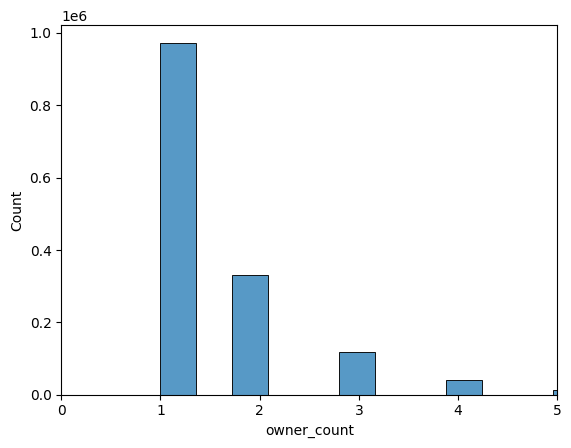

In [308]:
sns.histplot(cleaned_cars,x='owner_count',bins=50)
plt.xlim([0,5])

In [309]:
# from above histogram we can conclude that the graph is a right skewed graph.

In [310]:
cleaned_cars['owner_count']=cleaned_cars['owner_count'].fillna(1)  #filling null values of 'owner count' with mode which is 1.

In [311]:
cleaned_cars_null_perc=((cleaned_cars.isna().sum()/cleaned_cars.shape[0])*100).sort_values(ascending=False)
cleaned_cars_null_perc

franchise_make          19.087579
torque                  17.259537
highway_fuel_economy    16.375948
city_fuel_economy       16.375948
power                   16.047319
interior_color          12.799363
main_picture_url        12.302936
major_options            6.668178
horsepower               5.746123
engine_displacement      5.746123
wheelbase                5.308896
fuel_tank_volume         5.308896
height                   5.308896
back_legroom             5.308896
width                    5.308896
length                   5.308896
maximum_seating          5.308896
front_legroom            5.308896
wheel_system_display     4.891001
wheel_system             4.891001
mileage                  4.812836
trim_name                3.876415
trimId                   3.860849
engine_cylinders         3.352655
engine_type              3.352655
fuel_type                2.757430
description              2.596665
transmission             2.139471
transmission_display     2.139471
exterior_color

In [312]:
#for finding unique values in columns having  between 10 and 20% of null values
df_nulls_10_and_20=df_null_perc[(df_null_perc<20) & (df_null_perc>10)]#.index 
for i in df_nulls_10_and_20.index:
    print(cleaned_cars[i].value_counts())
    print()

franchise_make
Ford             395521
Chevrolet        338817
Toyota           186718
Honda            184515
Jeep             177100
Nissan           152590
Hyundai          107099
Kia               92690
RAM               77079
Buick             74419
Volkswagen        62430
Subaru            60899
GMC               60677
Dodge             49212
Mercedes-Benz     45867
Mazda             45743
BMW               45540
Cadillac          35081
Lexus             28602
Audi              26896
Acura             26282
Lincoln           25535
Mitsubishi        20079
Chrysler          19563
Volvo             19353
INFINITI          18665
Land Rover        12662
Porsche           10897
MINI               5448
Jaguar             4965
FIAT               4207
Scion              3976
Maserati           2598
Alfa Romeo         1486
Genesis            1123
Bentley             541
Rolls-Royce         506
Aston Martin        482
Ferrari             458
Lotus               436
McLaren             309
L

In [313]:
x=cleaned_cars['franchise_make'].dropna()

In [314]:
x.shape

(2427405,)

In [315]:
(3000040, 66)

(3000040, 66)

In [316]:
cleaned_cars['franchise_make'].isna().sum()

np.int64(572635)

In [317]:
df_nulls_10_and_20.index

Index(['franchise_make', 'torque', 'city_fuel_economy', 'highway_fuel_economy',
       'power', 'interior_color', 'main_picture_url'],
      dtype='object')

In [318]:
# z=cleaned_cars.dropna(['franchise_make', 'torque', 'city_fuel_economy', 'highway_fuel_economy',
#        'power', 'interior_color'],axis=1)

In [319]:
# cleaned_cars[['franchise_make','torque','city_fuel_economy','highway_fuel_economy','power','interior_color']].dropna(inplace=True)

In [320]:
cleaned_cars.shape

(3000040, 55)

In [321]:
cleaned_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000040 entries, 0 to 3000039
Data columns (total 55 columns):
 #   Column                Dtype  
---  ------                -----  
 0   vin                   object 
 1   back_legroom          object 
 2   body_type             object 
 3   city                  object 
 4   city_fuel_economy     float64
 5   daysonmarket          int64  
 6   dealer_zip            object 
 7   description           object 
 8   engine_cylinders      object 
 9   engine_displacement   float64
 10  engine_type           object 
 11  exterior_color        object 
 12  fleet                 object 
 13  frame_damaged         bool   
 14  franchise_dealer      bool   
 15  franchise_make        object 
 16  front_legroom         object 
 17  fuel_tank_volume      object 
 18  fuel_type             object 
 19  has_accidents         object 
 20  height                object 
 21  highway_fuel_economy  float64
 22  horsepower            float64
 23  interio

In [322]:
cleaned_cars_null_perc=((cleaned_cars.isna().sum()/cleaned_cars.shape[0])*100).sort_values(ascending=False)
cleaned_cars_null_perc

franchise_make          19.087579
torque                  17.259537
highway_fuel_economy    16.375948
city_fuel_economy       16.375948
power                   16.047319
interior_color          12.799363
main_picture_url        12.302936
major_options            6.668178
horsepower               5.746123
engine_displacement      5.746123
wheelbase                5.308896
fuel_tank_volume         5.308896
height                   5.308896
back_legroom             5.308896
width                    5.308896
length                   5.308896
maximum_seating          5.308896
front_legroom            5.308896
wheel_system_display     4.891001
wheel_system             4.891001
mileage                  4.812836
trim_name                3.876415
trimId                   3.860849
engine_cylinders         3.352655
engine_type              3.352655
fuel_type                2.757430
description              2.596665
transmission             2.139471
transmission_display     2.139471
exterior_color

In [323]:
null_frach=np.where(cleaned_cars['franchise_make'].isna())
null_frach

(array([    220,     221,     223, ..., 3000033, 3000035, 3000038]),)

In [324]:
cleaned_cars = cleaned_cars.dropna(subset=df_nulls_10_and_20.index)

In [325]:
# dropping 'main_picture_url', since links are of no use
cleaned_cars=cleaned_cars.drop('main_picture_url',axis=1)

In [326]:
cleaned_cars_null_perc=((cleaned_cars.isna().sum()/cleaned_cars.shape[0])*100).sort_values(ascending=False)
cleaned_cars_null_perc

mileage                 4.407650
major_options           3.441731
description             1.151630
seller_rating           0.800972
transmission            0.729100
transmission_display    0.729100
exterior_color          0.174232
wheel_system            0.069240
wheel_system_display    0.069240
length                  0.016085
fuel_tank_volume        0.016085
maximum_seating         0.016085
width                   0.016085
wheelbase               0.016085
back_legroom            0.016085
front_legroom           0.016085
height                  0.016085
body_type               0.001609
engine_cylinders        0.001097
engine_type             0.001097
fuel_type               0.000804
daysonmarket            0.000000
highway_fuel_economy    0.000000
has_accidents           0.000000
franchise_make          0.000000
franchise_dealer        0.000000
engine_displacement     0.000000
dealer_zip              0.000000
fleet                   0.000000
frame_damaged           0.000000
vin       

In [327]:
cleaned_cars['mileage'].value_counts()

mileage
0.0         128652
5.0          78297
10.0         76418
3.0          42120
2.0          41637
             ...  
128216.0         1
123184.0         1
105128.0         1
83906.0          1
87219.0          1
Name: count, Length: 127283, dtype: int64

- mileage column will be filled with median values. 

These columns are complex and should be dropped -
1. major_options          
2. description   

In [328]:
cleaned_cars['major_options'].value_counts()


major_options
['Alloy Wheels', 'Bluetooth', 'Backup Camera']                                                                                                                                                                                                                                                              40403
['Steel Wheels', 'Bluetooth', 'Backup Camera']                                                                                                                                                                                                                                                              15614
['Bluetooth', 'Backup Camera']                                                                                                                                                                                                                                                                              14526
['Alloy Wheels', 'Bluetooth', 'Backup Camera', 'Android Auto', 'CarP

In [329]:
cleaned_cars['description'].value_counts()

description
[!@@Additional Info@@!]Front Wheel Drive,Power Steering,ABS,4-Wheel Disc Brakes,Brake Assist,Wheel Covers,Steel Wheels,Tires - Front Performance,Tires - Rear Performance,Temporary Spare Tire,Power Mirror(s),Rear Defrost,Intermittent Wipers,Daytime Running Lights,Automatic Headlights,AM/FM Stereo,MP3 Player,Steering Wheel Audio Controls,Bluetooth Connection,Auxiliary Audio Input,Bucket Seats,Rear Bench Seat,Adjustable Steering Wheel,Trip Computer,Power Windows,Keyless Entry,Power Door Locks,Cruise Control,Adaptive Cruise Control,Climate Control,A/C,Cloth Seats,Driver Vanity Mirror,Passenger Vanity Mirror,Floor Mats,Power Windows,Power Door Locks,Trip Computer,Security System,Engine Immobilizer,Traction Control,Stability Control,Traction Control,Front Side Air Bag,Lane Departure Warning,Lane Keeping Assist,Lane Departure Warning,Tire Pressure Monitor,Driver Air Bag,Passenger Air Bag,Front Head Air Bag,Rear Head Air Bag,Passenger Air Bag Sensor,Child Safety Locks,Back-Up Camer

In [330]:
cleaned_cars=cleaned_cars.drop(['major_options','description'],axis=1)

In [331]:
cleaned_cars['mileage']=cleaned_cars['mileage'].fillna(np.median(cleaned_cars.dropna()['mileage']))

In [332]:
np.median(cleaned_cars.dropna()['mileage'])

np.float64(25.0)

In [333]:
cleaned_cars_null_perc=((cleaned_cars.isna().sum()/cleaned_cars.shape[0])*100).sort_values(ascending=False)
cleaned_cars_null_perc

seller_rating           0.800972
transmission            0.729100
transmission_display    0.729100
exterior_color          0.174232
wheel_system            0.069240
wheel_system_display    0.069240
length                  0.016085
wheelbase               0.016085
front_legroom           0.016085
back_legroom            0.016085
height                  0.016085
width                   0.016085
maximum_seating         0.016085
fuel_tank_volume        0.016085
body_type               0.001609
engine_type             0.001097
engine_cylinders        0.001097
fuel_type               0.000804
city                    0.000000
vin                     0.000000
has_accidents           0.000000
frame_damaged           0.000000
franchise_dealer        0.000000
franchise_make          0.000000
dealer_zip              0.000000
daysonmarket            0.000000
engine_displacement     0.000000
fleet                   0.000000
city_fuel_economy       0.000000
listed_date             0.000000
interior_c

In [334]:
cleaned_cars.shape

(1367713, 52)

In [335]:
#Now since we have very less null values we will use dropna on the entire remanining dataset
cleaned_cars=cleaned_cars.dropna()

In [336]:
cleaned_cars.shape

(1343523, 52)

In [337]:
#checking finally for null values-
cleaned_cars.isna().sum()

vin                     0
back_legroom            0
body_type               0
city                    0
city_fuel_economy       0
daysonmarket            0
dealer_zip              0
engine_cylinders        0
engine_displacement     0
engine_type             0
exterior_color          0
fleet                   0
frame_damaged           0
franchise_dealer        0
franchise_make          0
front_legroom           0
fuel_tank_volume        0
fuel_type               0
has_accidents           0
height                  0
highway_fuel_economy    0
horsepower              0
interior_color          0
isCab                   0
is_new                  0
latitude                0
length                  0
listed_date             0
listing_color           0
listing_id              0
longitude               0
make_name               0
maximum_seating         0
mileage                 0
model_name              0
owner_count             0
power                   0
price                   0
savings_amou

In [338]:
#dropping vin
cleaned_cars=cleaned_cars.drop('vin',axis=1)

In [339]:
cleaned_cars.shape

(1343523, 51)

In [340]:
# cleaned_cars.to_csv('trimmd_used_car.csv', index=False)  # to convert our cleaned df to a csv file.

In [341]:
cleaned_cars.head()

,back_legroom,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,engine_cylinders,engine_displacement,engine_type,exterior_color,...,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year
38,38.1 in,Sedan,Bay Shore,27.0,55,11706,I4,1500.0,I4,Silver Ice Metallic,...,"184 lb-ft @ 2,500 RPM",A,6-Speed Automatic,t74365,LT FWD,FWD,Front-Wheel Drive,111.4 in,73 in,2018
40,27.3 in,Coupe,Bronx,18.0,36,10466,V6,3500.0,V6,Black,...,"280 lb-ft @ 4,800 RPM",A,6-Speed Automatic,t76289,AWD,AWD,All-Wheel Drive,107.5 in,81.5 in,2018
41,38.4 in,SUV / Crossover,Bay Shore,18.0,27,11706,V6,3600.0,V6,Silver Ice Metallic,...,"266 lb-ft @ 2,800 RPM",A,9-Speed Automatic,t73662,LT Cloth FWD,FWD,Front-Wheel Drive,120.9 in,78.6 in,2018
45,36.8 in,SUV / Crossover,Bay Shore,15.0,27,11706,V6,3600.0,V6,Silver Ice Metallic,...,"266 lb-ft @ 3,400 RPM",A,6-Speed Automatic,t67372,1LT AWD,AWD,All-Wheel Drive,118.9 in,78.5 in,2017
47,38.6 in,SUV / Crossover,Bay Shore,18.0,24,11706,V6,3600.0,V6,Diamond Black Crystal Pearlcoat,...,"260 lb-ft @ 4,800 RPM",A,8-Speed Automatic,t75215,Altitude 4WD,4WD,Four-Wheel Drive,114.8 in,84.8 in,2018


In [342]:
# cleaned_cars.wheel_system

In [343]:
cleaned_cars.wheelbase	

38         111.4 in
40         107.5 in
41         120.9 in
45         118.9 in
47         114.8 in
             ...   
3000011    112.7 in
3000024    131.6 in
3000025    107.1 in
3000026    100.6 in
3000036    120.9 in
Name: wheelbase, Length: 1343523, dtype: object

In [344]:
cleaned_cars.shape

(1343523, 51)

In [345]:
# Columns similiar to 'vin' which are not needed- 
# trimid,
#engine cylinder and engine type are the same columns

sum(cleaned_cars['engine_cylinders']==cleaned_cars['engine_type'])  # which is equal to - cleaned_cars['engine_cylinders'].shape

1343523

In [346]:
#dropping columns which are not needed such as id columns-
cleaned_cars=cleaned_cars.drop(['trimId','listing_id','sp_id','engine_type'],axis=1)

In [347]:
cleaned_cars['trim_name'].value_counts()

trim_name
SE FWD                          37126
S FWD                           26627
SV FWD                          25376
XLT SuperCrew 4WD               25269
LT FWD                          22113
                                ...  
TDI Sport with Tech                 1
Release Series 7.0                  1
3.5 FWD with Navigation             1
286hp HSE Luxury AWD                1
4 Dr Limited 7-Passenger AWD        1
Name: count, Length: 4829, dtype: int64

In [348]:

# Columns where feature eng is needed-
# max_sitting, columns which have inches in them
#dealer_zip, backle

In [349]:
cleaned_cars.shape

(1343523, 47)

In [350]:
categorical_columns = cleaned_cars.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['back_legroom', 'body_type', 'city', 'dealer_zip', 'engine_cylinders',
       'exterior_color', 'fleet', 'franchise_make', 'front_legroom',
       'fuel_tank_volume', 'fuel_type', 'has_accidents', 'height',
       'interior_color', 'isCab', 'length', 'listed_date', 'listing_color',
       'make_name', 'maximum_seating', 'model_name', 'power', 'sp_name',
       'torque', 'transmission', 'transmission_display', 'trim_name',
       'wheel_system', 'wheel_system_display', 'wheelbase', 'width'],
      dtype='object')


In [351]:
cleaned_cars.listed_date

38         2020-07-16
40         2020-08-04
41         2020-08-13
45         2020-08-13
47         2020-08-16
              ...    
3000011    2020-09-10
3000024    2020-08-14
3000025    2020-08-13
3000026    2020-08-11
3000036    2020-03-25
Name: listed_date, Length: 1343523, dtype: object

In [352]:
cleaned_cars.make_name.value_counts()

make_name
Ford             172522
Chevrolet        165265
Nissan           121996
Honda            114364
Jeep              98092
Hyundai           65497
Toyota            64355
Dodge             51684
Kia               50990
RAM               44011
GMC               41038
Subaru            35858
Mazda             31654
Cadillac          29632
Buick             29510
Mercedes-Benz     29495
Volkswagen        28879
BMW               28329
Chrysler          19207
Lincoln           17822
Lexus             15726
Acura             15132
INFINITI          14449
Audi              12401
Volvo             11941
Land Rover         7322
Mitsubishi         6597
Jaguar             4587
Porsche            4073
MINI               3209
Alfa Romeo         2394
FIAT               1234
Maserati           1086
Genesis             841
Bentley             319
Scion               292
Ferrari             268
Pontiac             263
Aston Martin        252
Saturn              227
Mercury             170
Rolls-

In [353]:
cleaned_cars.sp_name.value_counts()

sp_name
Honda World                                    1407
Huntington Beach Chrysler Dodge Jeep Ram       1204
Jeff Wyler Eastgate Auto Mall                  1142
Rock Honda                                      968
Varsity Ford                                    968
                                               ... 
East Tennessee Ford Dodge Chrysler Jeep RAM       1
Seaview Buick GMC                                 1
Courtesy Ford Lincoln                             1
Bellingham Ford Lincoln                           1
Volvo Cars Seattle                                1
Name: count, Length: 12190, dtype: int64

In [354]:
categorical_columns = cleaned_cars.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['back_legroom', 'body_type', 'city', 'dealer_zip', 'engine_cylinders',
       'exterior_color', 'fleet', 'franchise_make', 'front_legroom',
       'fuel_tank_volume', 'fuel_type', 'has_accidents', 'height',
       'interior_color', 'isCab', 'length', 'listed_date', 'listing_color',
       'make_name', 'maximum_seating', 'model_name', 'power', 'sp_name',
       'torque', 'transmission', 'transmission_display', 'trim_name',
       'wheel_system', 'wheel_system_display', 'wheelbase', 'width'],
      dtype='object')


In [355]:
cleaned_cars.back_legroom

38         38.1 in
40         27.3 in
41         38.4 in
45         36.8 in
47         38.6 in
            ...   
3000011    39.6 in
3000024    41.5 in
3000025      29 in
3000026    35.7 in
3000036    38.4 in
Name: back_legroom, Length: 1343523, dtype: object

In [356]:
continuous_columns = cleaned_cars.select_dtypes(include=['float', 'int']).columns
print(continuous_columns)

Index(['city_fuel_economy', 'daysonmarket', 'engine_displacement',
       'highway_fuel_economy', 'horsepower', 'latitude', 'longitude',
       'mileage', 'owner_count', 'price', 'savings_amount', 'seller_rating',
       'year'],
      dtype='object')


In [357]:
cleaned_cars.year.value_counts().head()

year
2020    732928
2017    167697
2019    136095
2018     98064
2021     55363
Name: count, dtype: int64

In [358]:
# Some feature engineering-
cleaned_cars['back_legroom'] = pd.to_numeric(cleaned_cars['back_legroom'].str.replace(' in', '', regex=False), errors='coerce')


In [359]:
cleaned_cars['front_legroom'] = pd.to_numeric(cleaned_cars['front_legroom'].str.replace(' in', '', regex=False), errors='coerce')


In [360]:
cleaned_cars['fuel_tank_volume'] = pd.to_numeric(cleaned_cars['fuel_tank_volume'].str.replace(' gal', '', regex=False), errors='coerce')


In [361]:
cleaned_cars['height'] = pd.to_numeric(cleaned_cars['height'].str.replace(' in', '', regex=False), errors='coerce')

In [362]:
cleaned_cars['length'] = pd.to_numeric(cleaned_cars['length'].str.replace(' in', '', regex=False), errors='coerce')


In [363]:
['back_legroom','front_legroom','fuel_tank_volume','height','length']  #columns where feature engineering is done to convert them to numerical columns

['back_legroom', 'front_legroom', 'fuel_tank_volume', 'height', 'length']

# Descriptive Analysis-

In [378]:
# 1. Univariate analysis

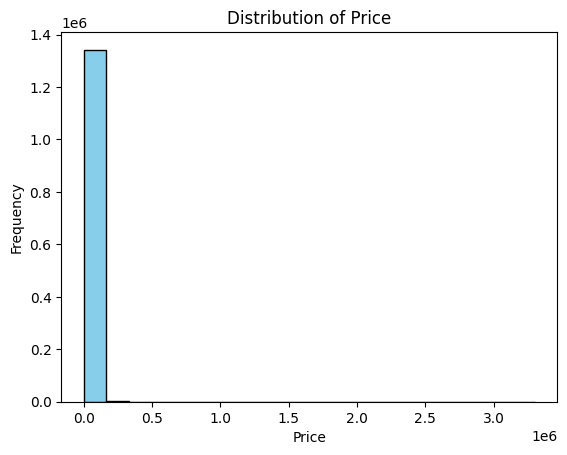

In [379]:
# I) for price column - Histogram

plt.hist(cleaned_cars['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

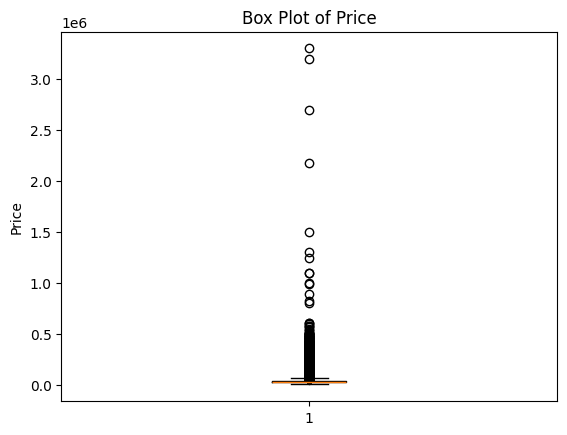

In [380]:
# II) for price column - Boxplot

plt.boxplot(cleaned_cars['price'])
plt.title('Box Plot of Price')
plt.ylabel('Price')
plt.show()

In [381]:
# 2. Bivariate analysis

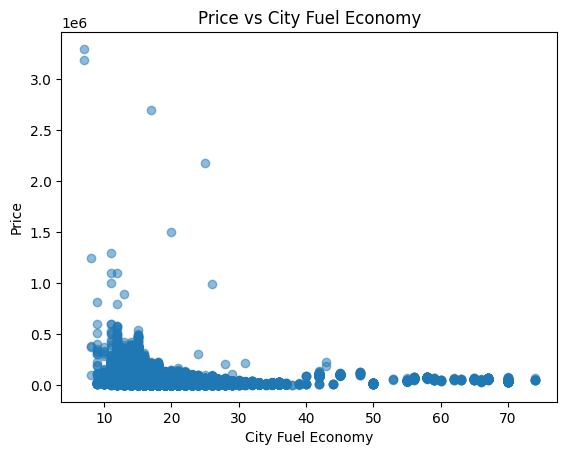

In [382]:
# I) for price vs city_fuel_economy - scatter plot

plt.scatter(cleaned_cars['city_fuel_economy'], cleaned_cars['price'], alpha=0.5)
plt.title('Price vs City Fuel Economy')
plt.xlabel('City Fuel Economy')
plt.ylabel('Price')
plt.show()

In [383]:
# II) for body_type vs price - Bar plot

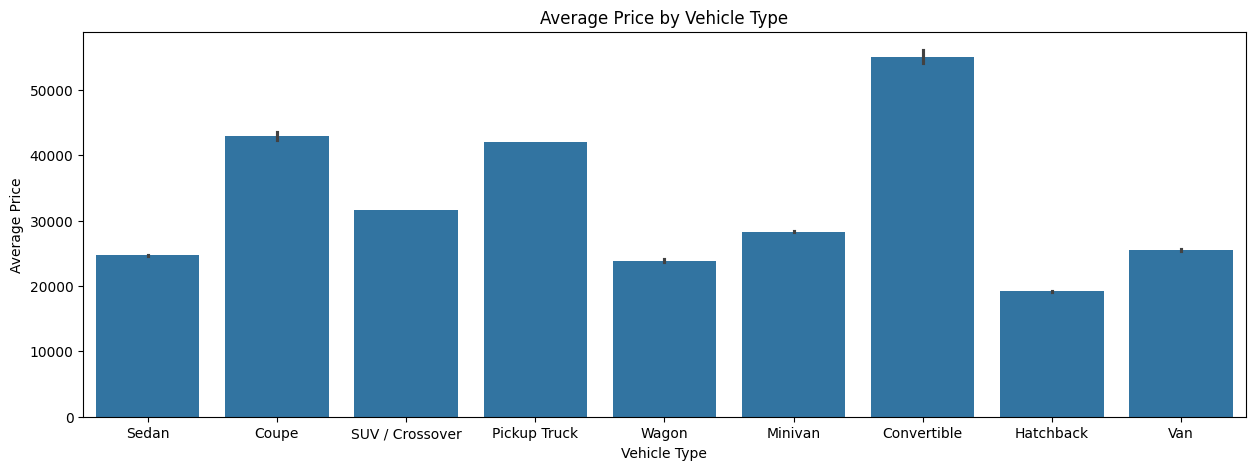

In [388]:
plt.figure(figsize=(15,5))
sns.barplot(x='body_type', y='price', data=cleaned_cars)
plt.title('Average Price by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Price')
plt.show()

In [385]:
# 3. Multivariate analysis

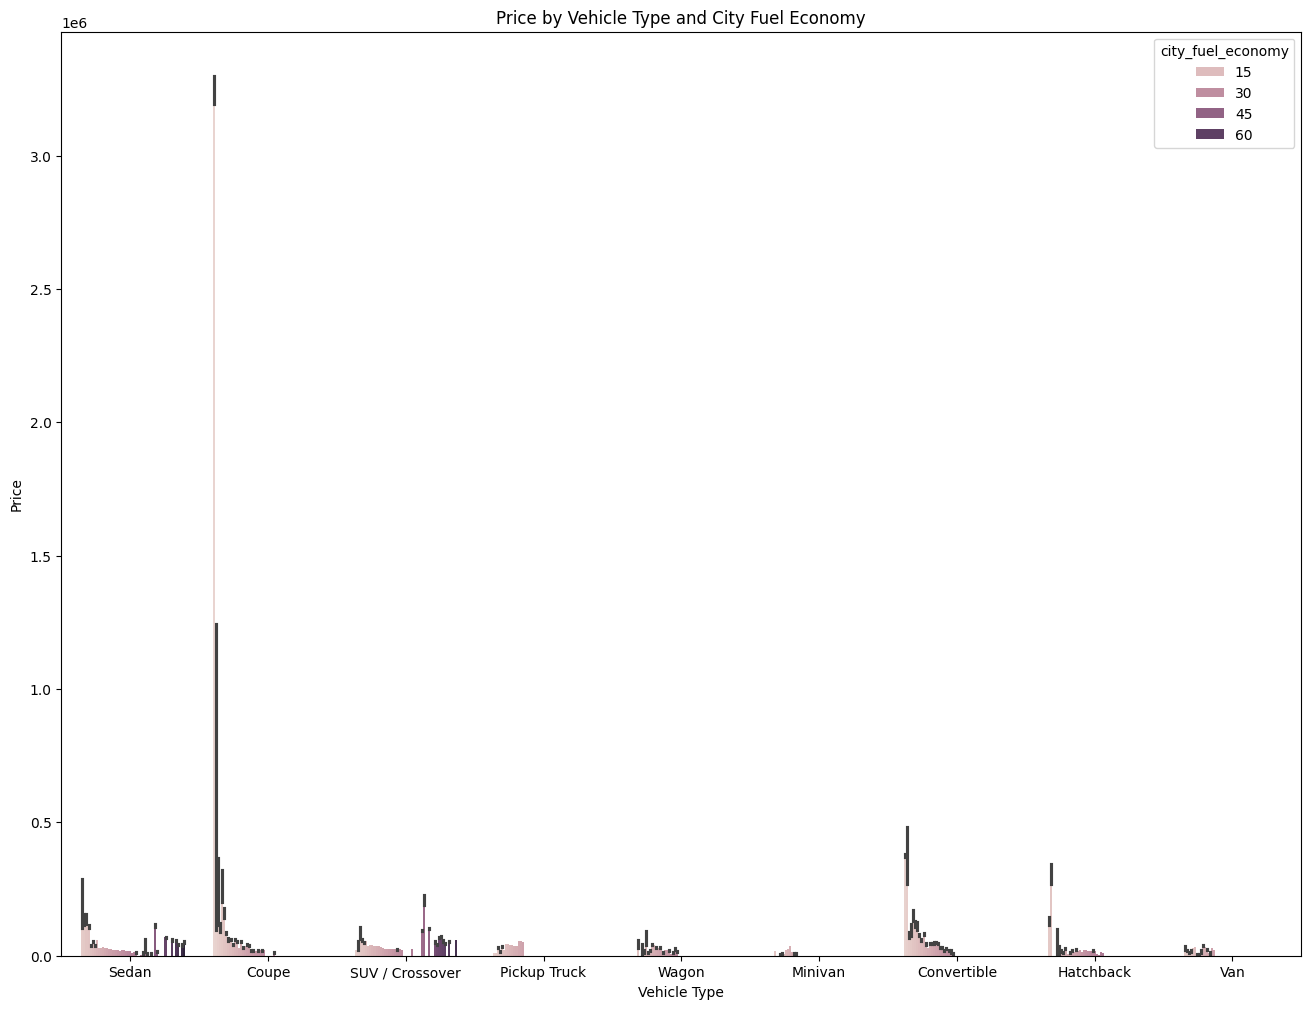

In [386]:
# I) for body_type and city_fuel_economy vs price

plt.figure(figsize=(16,12))
sns.barplot(x='body_type', y='price', hue='city_fuel_economy', data=cleaned_cars)
plt.title('Price by Vehicle Type and City Fuel Economy')
plt.xlabel('Vehicle Type')
plt.ylabel('Price')
plt.show()

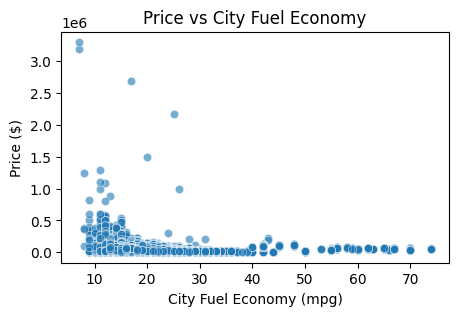

In [364]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='city_fuel_economy', y='price', data=cleaned_cars, alpha=0.6)
plt.title('Price vs City Fuel Economy')
plt.xlabel('City Fuel Economy (mpg)')
plt.ylabel('Price ($)')
plt.show()

<Axes: xlabel='year', ylabel='Count'>

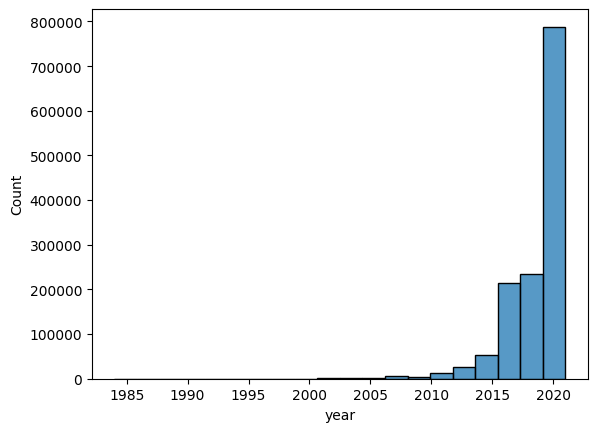

In [365]:
sns.histplot(data=cleaned_cars,x='year',bins=20)

In [389]:
#Above plot shows sales of cars over the years. We can see it is left skewed

<Axes: xlabel='year', ylabel='price'>

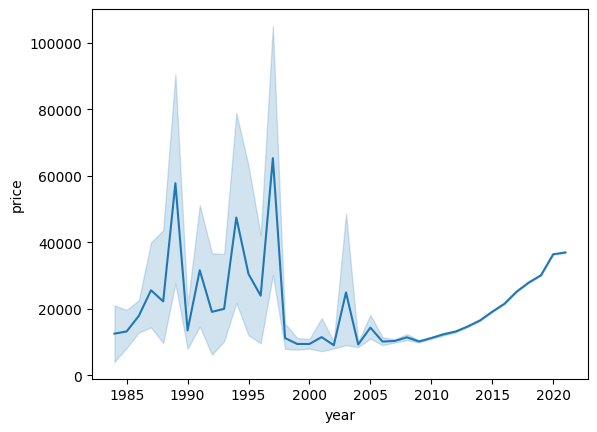

In [367]:
sns.lineplot(data=cleaned_cars,x='year',y='price')

In [392]:
#Above plot shows price of cars over the years. 
# The trend shows that before the year 2000, the prices of the cars were higher as compared to after the year 2000.

C:\Users\AAYUSH\AppData\Local\Temp\ipykernel_19036\1466270632.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fuel_type', data=cleaned_cars, palette="viridis")


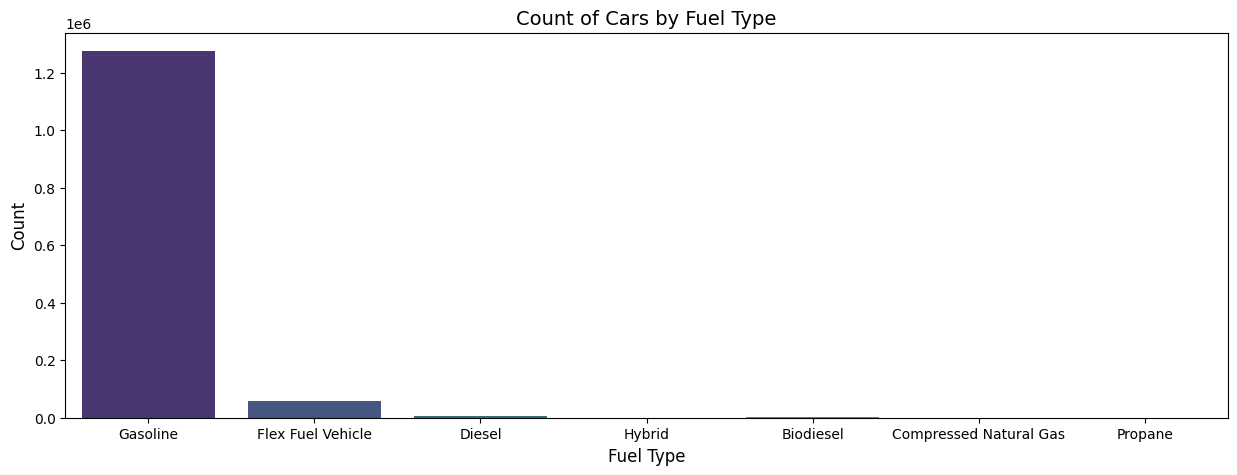

In [369]:
plt.figure(figsize=(15, 5))
sns.countplot(x='fuel_type', data=cleaned_cars, palette="viridis")
plt.title("Count of Cars by Fuel Type", fontsize=14)
plt.xlabel("Fuel Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

In [370]:
#above plot shows that max cars have fuel_type- 'Gasoline'

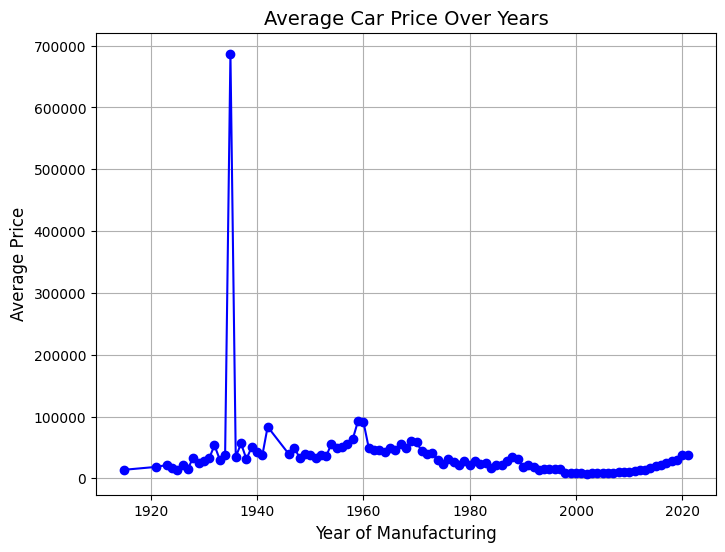

In [377]:
plt.figure(figsize=(8, 6))
avg_price_per_year = cars.groupby('year')['price'].mean()
avg_price_per_year.plot(kind='line', marker='o', color='blue')
plt.title("Average Car Price Over Years", fontsize=14)
plt.xlabel("Year of Manufacturing", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.grid()
plt.show()

In [371]:
for_corr=cleaned_cars[['city_fuel_economy', 'daysonmarket', 'engine_displacement',
       'highway_fuel_economy', 'horsepower',
       'mileage', 'owner_count', 'savings_amount', 'seller_rating','back_legroom', 'front_legroom', 'fuel_tank_volume', 'height', 'length','price']]

In [372]:
corr_mat = for_corr.corr().round(2)

In [373]:
for_corr.corr()['price']

city_fuel_economy      -0.426465
daysonmarket            0.112649
engine_displacement     0.419950
highway_fuel_economy   -0.447247
horsepower              0.631933
mileage                -0.374135
owner_count            -0.206647
savings_amount          0.000895
seller_rating           0.103036
back_legroom            0.300566
front_legroom           0.055443
fuel_tank_volume        0.462922
height                  0.314483
length                  0.393252
price                   1.000000
Name: price, dtype: float64

<Axes: >

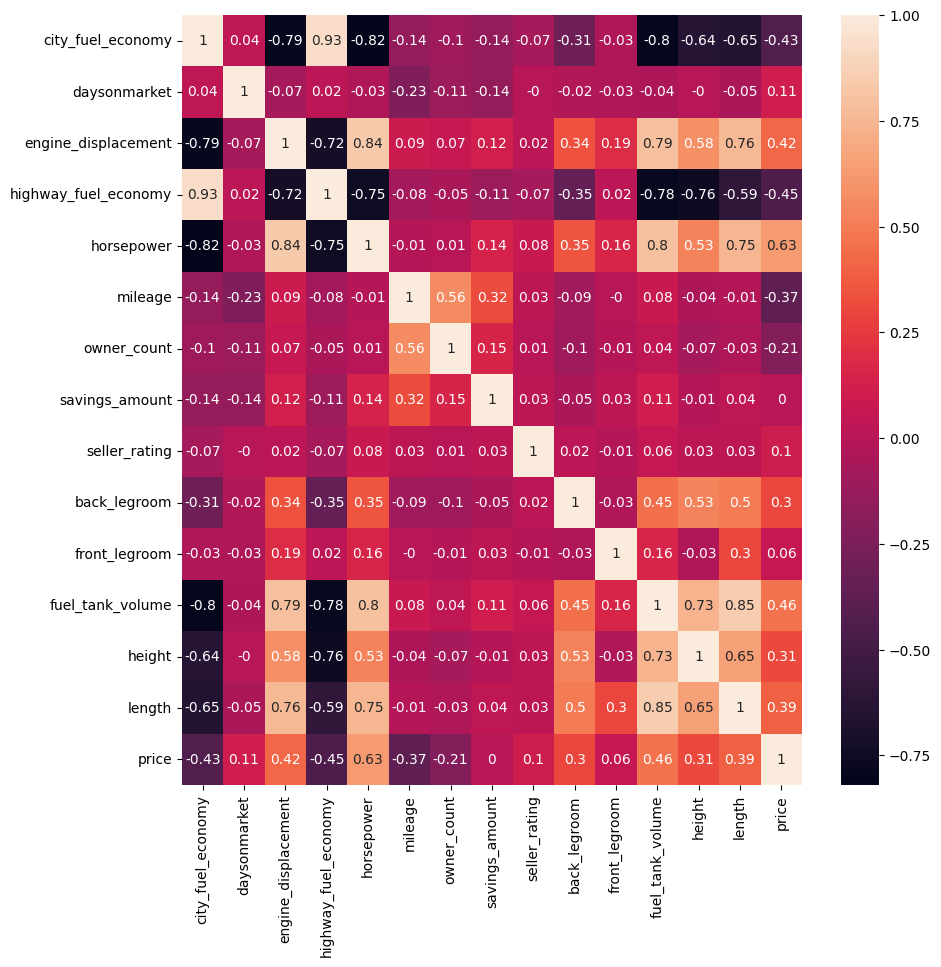

In [374]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat,annot=True)

In [375]:
# (for_corr.corr()['price']>-0.5)

Important continuous columns for model-
1. highway fuel economy
2. engine_displacement
3. city fuel economy
4. mileage

In [376]:
cleaned_cars['fuel_tank_volume']

38         15.8
40         17.4
41         19.4
45         22.0
47         24.6
           ... 
3000011    19.4
3000024    27.8
3000025    15.5
3000026    14.0
3000036    19.4
Name: fuel_tank_volume, Length: 1343523, dtype: float64